# Isogenies

**Note: due to the context of this being explained during Sage days, I assume you are all running the most up to date version of SageMath at the time of writing (version 10.2)**

This notebook assumes you have already gone through, or are familiar with using elliptic curves in Sage. For those who need more information or a refresher, see the `elliptic_curves` notebook. 

Unless otherwise stated, we will work with the following finite field and curve:


In [2]:
a, b = 13, 7
p = 2^a * 3^b - 1
F.<i> = GF(p**2, modulus=[1,0,1])

E = EllipticCurve(F, [0, 6, 0, 1, 0])
print(f"{E = }")
P, Q = E.gens()
print(f"{P = }")
print(f"{Q = }")

E = Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2
P = (12772366*i + 5961474 : 5144390*i + 13478759 : 1)
Q = (8260143*i + 518463 : 2768119*i + 4146976 : 1)


## Isomorphisms

As we have done half the work here already in the elliptic curves section, let us continue looking at elliptic curves and isogenies by first considering isomorphisms between curves and points.

### Mapping to Short Weierstrass Form

Let us first look at how we can map from the Montgomery model to a short Weierstrass curve.

In [48]:
# Given the isomorphic curve in the Short Weierstrass model
# we can compute the isomorphism with the isomorphism_to method
E_short = E.short_weierstrass_model()
iso_to_E_short = E.isomorphism_to(E_short)
print(iso_to_E_short)

Elliptic-curve morphism:
  From: Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2
  To:   Elliptic Curve defined by y^2 = x^3 + 17901647*x + 653184 over Finite Field in i of size 17915903^2
  Via:  (u,r,s,t) = (14929919, 17915901, 0, 0)


In [49]:
# We can also map points on one curve to another like so:
P_short = iso_to_E_short(P)
Q_short = iso_to_E_short(Q)
print(f"{P_short = }")
print(f"{Q_short = }")
print(f"{P_short.curve() = }")

P_short = (11907601*i + 17538203 : 17513649*i + 8880245 : 1)
Q_short = (10710700*i + 748837 : 11226998*i + 48334 : 1)
P_short.curve() = Elliptic Curve defined by y^2 = x^3 + 17901647*x + 653184 over Finite Field in i of size 17915903^2


### Mapping to the Montgomery Model

The above works for any two isomorphic curves. As long as `E.is_isomorphic(E_prime)` returns `True`, then `isomorphism_to()` will return the morphism between curves with a `domain` equal to `E` and `codomain` equal to `E_prime.`

For mapping to the Montgomery model, there's actually an even easier method thanks to a relatively recent function. Let's see how it works. Calling the following function returns the correct codomain:

In [50]:
E_mont = E_short.montgomery_model()
print(f"{E_mont = }")
print(f"{E_mont.is_isomorphic(E) = }")

E_mont = Elliptic Curve defined by y^2 = x^3 + 14772668*x^2 + x over Finite Field in i of size 17915903^2
E_mont.is_isomorphic(E) = True


However, if we want the morphism between these two curves instead, we can use the following optional argument

In [51]:
(E_mont, iso_to_mont) = E_short.montgomery_model(morphism=True)
iso_to_mont

Elliptic-curve morphism:
  From: Elliptic Curve defined by y^2 = x^3 + 17901647*x + 653184 over Finite Field in i of size 17915903^2
  To:   Elliptic Curve defined by y^2 = x^3 + 14772668*x^2 + x over Finite Field in i of size 17915903^2
  Via:  (u,r,s,t) = (12422522, 16275630, 0, 0)

Now, instead of returning the codomain, we also get the isomorphism between curves. Just like the above, we can map points through this morphism

In [52]:
print(f"{iso_to_mont(P) = }")
print(f"{iso_to_mont(Q) = }")

iso_to_mont(P) = (323911*i + 10826241 : 7815892*i + 2464233 : 1)
iso_to_mont(Q) = (6301774*i + 2588315 : 3816725*i + 219936 : 1)


## Isogenies from Points

Given a point $P$ on the elliptic curve $E$, the isogeny with kernel $\phi = \langle P \rangle$ can be computed using Velu's formula with the simple call `E.isogeny(P)`. Here's an example with a point of order two:

In [53]:
P_2 = E(0,0)
assert P_2.order() == 2
phi = E.isogeny(P_2)
print(phi)

Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 17915899*x + 17915879 over Finite Field in i of size 17915903^2


Be cautious that the complexity here is $\mathcal{O}(\ell)$, so for large order points this can get slow. Notice that this function does not require the point to have smooth order.

In [54]:
P_4 = P * (P.order() // 4)
assert P_4.order() == 4
%time E.isogeny(P_4)

P_128 = P * (P.order() // 128)
assert P_128.order() == 128
%timeit E.isogeny(P_128)

CPU times: user 2.4 ms, sys: 388 µs, total: 2.79 ms
Wall time: 2.47 ms
18.6 ms ± 549 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can also send in a list of points and compute the isogeny generated by them all. For example:

In [3]:
P_2 = (P.order() // 2) * P
P_3 = (P.order() // 3) * P
E.isogeny([P_2, P_3])

Isogeny of degree 6 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 6364184*x + 13370478 over Finite Field in i of size 17915903^2

## Smooth Degree Isogenies

Sage also has an inbuilt method for computing smooth degree isogenies via the `E.isogeny(K, algorithm="factored")` method. We can use this again for any input, but if it's not smooth the slow down will happen on one of the Velu steps along the way.

In [55]:
P_128 = P * (P.order() // 128)
assert P_128.order() == 128
%timeit E.isogeny(P_128)
%timeit E.isogeny(P_128, algorithm="factored")

19 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.56 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Large Degree Isogenies

For odd orders larger than `9`, we can also use the $\sqrt{\text{Velu}}$ algorithm. *Technically*, this should be faster at about $\ell = 100$, but in practice because of the slowness of parts of the Polynomial Ring classes, we find the turning point is much closer to $\ell = 1000$.

In [56]:
P_2187 = P * 2**13
assert P_2187.order() == 2187
%timeit E.isogeny(P_2187)
%timeit E.isogeny(P_2187, algorithm="velusqrt")

347 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
58.8 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**TODO**: Note that currently the "factored" algorithm does not use the "velusqrt" algorithm for isogenies of a certain degree, this could be something we could look at this week.

## Isogenies from Kernel Polynomials

Another method to compute isogenies is to use the kernel polynomial rather than a point (or several points) generating the kernel. The function call itself looks the same and Sage cleverly picks between Velu or Kohel's algorithm depending on whether a point or polynomial is given as input.

In [57]:
# Simple isogeny of degree 2
R.<x> = PolynomialRing(F)
print(E.isogeny(x))

# Compute an isogeny from a point
K = P * (P.order() // 3)
phi = E.isogeny(K)

# Compute the same isogeny from the kernel polynomial
k = phi.kernel_polynomial()
print(E.isogeny(k))

Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 17915899*x + 17915879 over Finite Field in i of size 17915903^2
Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 5478422*x + 9659211 over Finite Field in i of size 17915903^2


## Isogenies Between Curves

Given two elliptic curves which are are related by a _**normalized**_ isogeny of known degree, we can use Sage to compute the kernel polynomial using either Stark's or the BMSS algorithm.

In [58]:
from sage.schemes.elliptic_curves.ell_curve_isogeny import compute_isogeny_kernel_polynomial

Pw, Qw = E_short.gens()
K = Pw * (Pw.order() // 9)
C = E_short.isogeny(K).codomain()
k = compute_isogeny_kernel_polynomial(E_short, C, 9)

# Make sure the codomain matches:
CC = E_short.isogeny(k).codomain()

print(f"{CC.is_isomorphic(C) = }")

CC.is_isomorphic(C) = True


Alternatively, the isogeny can be recovered directly by omitting the kernel from the `.isogeny()` method and passing a codomain and degree instead:

In [9]:
phi = E_short.isogeny(None, C, degree=9)
print(f'{phi = }')
print(f'{k == phi.kernel_polynomial() = }')
print(f'{phi == E_short.isogeny(k) = }')

phi = Isogeny of degree 9 from Elliptic Curve defined by y^2 = x^3 + 17901647*x + 653184 over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + (13267354*i+2251407)*x + (11340965*i+2147998) over Finite Field in i of size 17915903^2
k == phi.kernel_polynomial() = True
phi == E_short.isogeny(k) = True


**TODO**: One thing currently missing is a brute-force enumeration for small or smooth degree using a meet in the middle attack. This is something which could be included this week.

## Enumerating Isogenies

Sage also allows us to look at all $\ell$-isogenies (up to post-composition with isomorphisms) from a given curve:

In [4]:
E.isogenies_prime_degree(2)

[Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 17915899*x + 17915879 over Finite Field in i of size 17915903^2,
 Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 4352769*x + 12638022 over Finite Field in i of size 17915903^2,
 Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 13562976*x + 5278457 over Finite Field in i of size 17915903^2]

In [5]:
E.isogenies_prime_degree(3)

[Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 5478422*x + 9659211 over Finite Field in i of size 17915903^2,
 Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + 100158*x + 1927947 over Finite Field in i of size 17915903^2,
 Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + (7198099*i+15126175)*x + (2026741*i+12126540) over Finite Field in i of size 17915903^2,
 Isogeny of degree 3 from Elliptic Curve defined by y^2 = x^3 + 6*x^2 + x over Finite Field in i of size 17915903^2 to Elliptic Curve defined by y^2 = x^3 + 6*x^2 + (10717804*i+15126175)*x + (15889162*i+12126540) over Finite Field in i of size 17915903^2]

## Modular Polynomials

TODO: do we have to install the package for `ClassicalModularPolynomialDatabase()` still or is there a way to get this automatically? Should this be included automatically? It's always felt a little annoying that it was a optional thing and I know from other ppl that sometimes installing the kohel_database fails.

(**Answer**: For now, `pari.polmodular()` works but can be slightly inconvenient since it returns a PARI object. Starting from Sage 10.3, we can just use the new `classical_modular_polynomial()` function added in #36190.)

## Computing Isogeny Graphs

For small examples, it can be nice to use Sage to plot isogeny graphs for you. There's not much to it, compute the graph and then plot it! Of course for very large graphs this will be very slow!

The function `isogeny_ell_graph()` returns a `Graph` object, and the only necessary argument needed is $\ell$ to create the $\ell$-isogeny graph.

### Supersingular graphs over $\mathbb{F}_p$

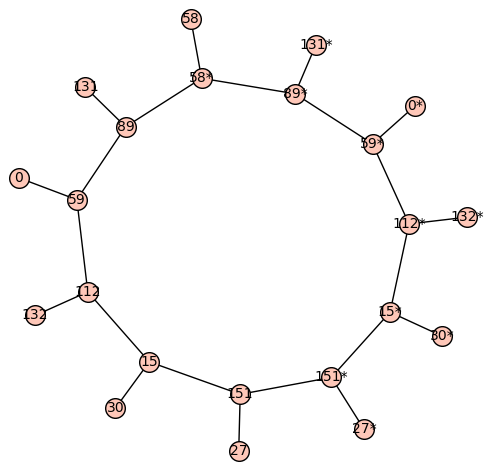

In [60]:
E_sing = EllipticCurve(GF(167), j=1728)
assert E_sing.is_supersingular()
G = E_sing.isogeny_ell_graph(2, directed=False, label_by_j=True)
G.plot()

### Supersingular graphs over $\mathbb{F}_{p^2}$

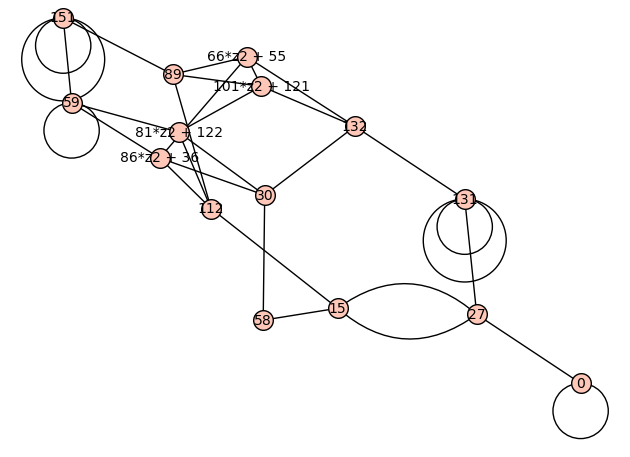

In [61]:
E_sing2 = EllipticCurve(GF(167^2), j=1728)
assert E_sing2.is_supersingular()
G = E_sing2.isogeny_ell_graph(3, directed=False, label_by_j=True)
G.plot()

### Ordinary graphs over $\mathbb{F}_{p}$

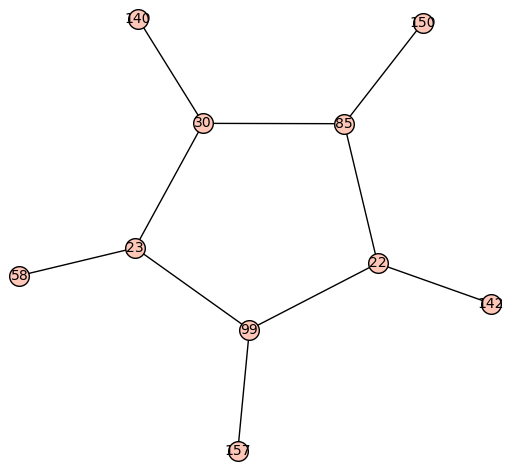

In [11]:
E_ord = EllipticCurve(GF(163), [1,2])
assert not E_ord.is_supersingular()
G = E_ord.isogeny_ell_graph(2, directed=False, label_by_j=True)
G.plot()

### Ordinary graphs over $\mathbb{F}_{p^2}$

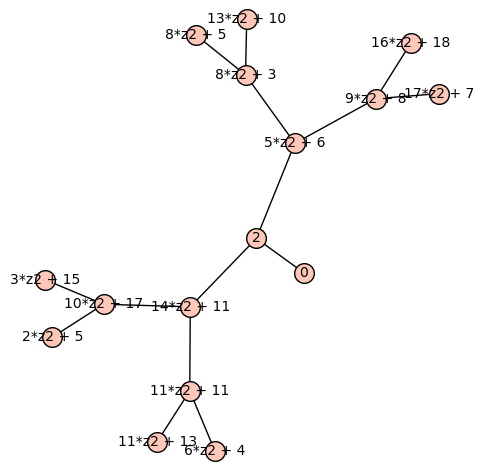

In [62]:
E_ord = EllipticCurve(GF(19^2), [1,2])
assert not E_ord.is_supersingular()
G = E_ord.isogeny_ell_graph(2, directed=False, label_by_j=True)
G.plot()